**UNIT - Curso de Computação**

**Processamento de Imagens de Computação Gráfica**

Profª. Layse Santos Souza

# **Transformação da Escala de Cinza**

* Gerando o negativo de uma imagem

In [34]:
# importando as bilbiotecas
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow

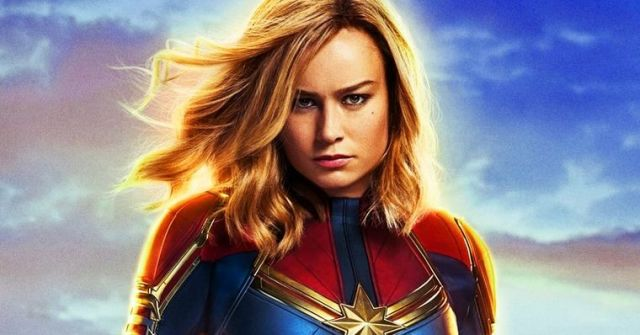

In [35]:
# exibindo a imagem
imagem = cv.imread('/content/capitaMarvel.jpeg')
cv2_imshow(imagem)

In [36]:
# função parar gerar o negativo de uma imagem
def imagemNegativa(imagem):
  img = -1 * imagem + 255
  return img

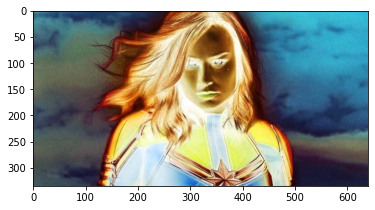

In [37]:
# imprimindo a imagem negativa
plt.imshow(imagemNegativa(imagem))

* Transformação Linear

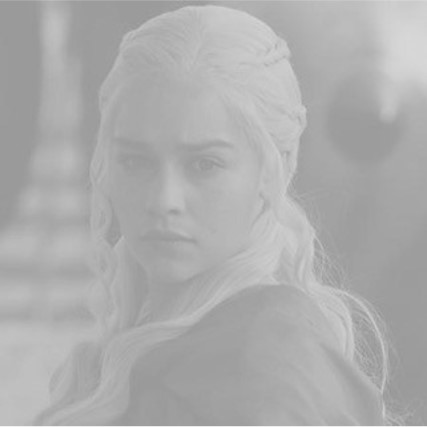

In [38]:
imagem = cv.imread('/content/imagem.jpg')
cv2_imshow(imagem)

In [39]:
def transformacao_linear(imagem, g_min, g_max):
    
    #Seleciona os valores max e min de pixel da imagem original
    f_min = min(imagem.flatten())
    f_max = max(imagem.flatten())
    
    #Calculo de a
    a = (g_max - g_min) / (f_max - f_min)
    b = g_min
    
    imagem = imagem - f_min
    
    novaImagem = (a*imagem) + b
    
    return np.uint8(novaImagem)

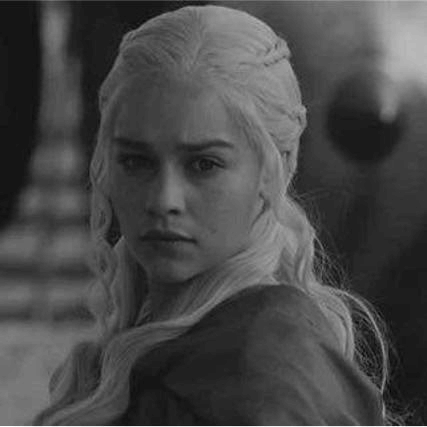

In [40]:
nova_imagem = transformacao_linear(imagem, 0, 255)   #aplicar transformacao_linear para imagem clara
cv2_imshow(nova_imagem)

In [41]:
# A função a seguir retorna o histograma de uma imagem         
def get_histogram(imagem, limite_cinza):
    array = imagem.flatten()
    hist = np.zeros(limite_cinza,dtype='int')
    for i in range(0, len(array)):
        hist[array[i]] +=1
    return hist

<Figure size 432x288 with 0 Axes>

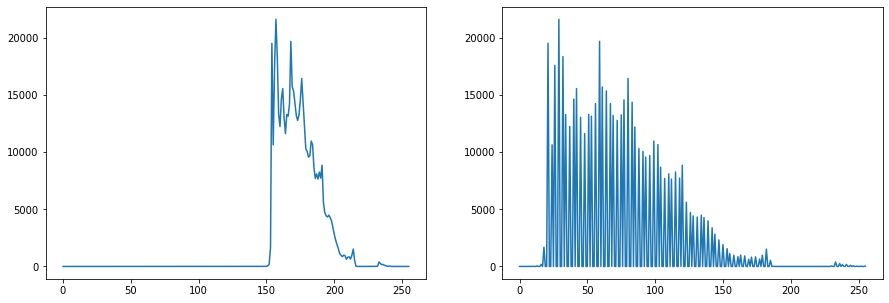

In [42]:
# Gerando o histograma 
histogram_contraste = get_histogram(imagem, 256)     

x_contraste = range(len(histogram_contraste))
y_contraste = histogram_contraste

histogram_nova = get_histogram(nova_imagem, 256)

x_nova = range(len(histogram_nova))
y_nova = histogram_nova

plt.clf()
plt.figure(figsize=(15,5))   # (largura, altura)
plt.subplot(121)   #1 linha, 1 coluna, 1 posição
plt.plot(x_contraste, y_contraste)  
plt.subplot(122) #1 linha, 2 coluna, 2 posição
plt.plot(x_nova, y_nova)

* Transformação não-linear

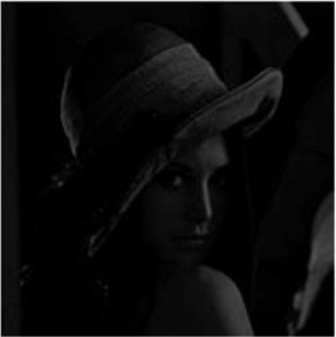

In [43]:
imagemNL = cv.imread('/content/Imagem1.jpg')
cv2_imshow(imagemNL)

* Transformação não-linear - Logaritmo

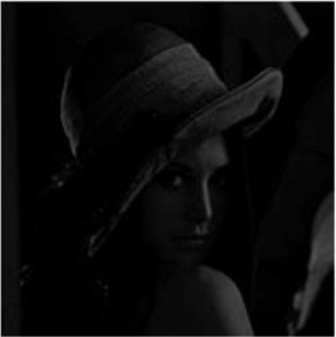

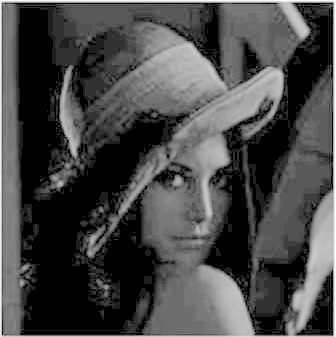

In [44]:
img1 = cv.imread('/content/Imagem1.jpg')
cv2_imshow(img1)

#Transformação logarítmica
c = 255 / (np.log(1 + np.max(img1)))
img2 = c * np.log(1 + img1)

#Converte o tipo
img2 = np.array(img2, dtype=np.uint8)

#Mostra a imagem processada
cv2_imshow(img2)

<Figure size 432x288 with 0 Axes>

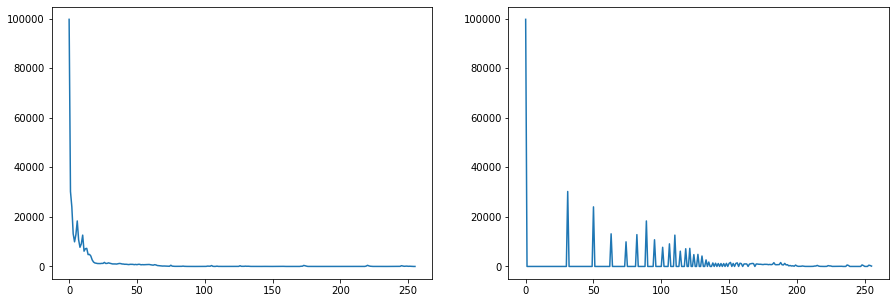

In [45]:
# Gerando o histograma 
histogram_logaritmo = get_histogram(img1, 256)     

x_contraste = range(len(histogram_logaritmo))
y_contraste = histogram_logaritmo

histogram_nova = get_histogram(img2, 256)

x_nova = range(len(histogram_nova))
y_nova = histogram_nova

plt.clf()
plt.figure(figsize=(15,5))   # (largura, altura)
plt.subplot(121)   #1 linha, 1 coluna, 1 posição
plt.plot(x_contraste, y_contraste)  
plt.subplot(122) #1 linha, 2 coluna, 2 posição
plt.plot(x_nova, y_nova)

* Transformação não-linear - Exponencial

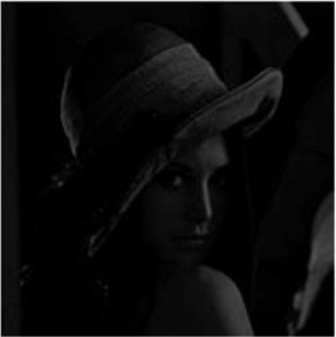

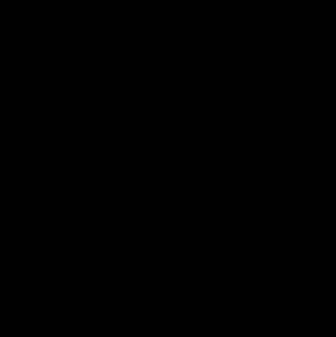

In [46]:
img3 = cv.imread('/content/Imagem1.jpg')
cv2_imshow(img3)

#Transformação exponencial
img4 = cv.normalize(img3.astype('double'), None, 0.0, 1.0, cv.NORM_MINMAX)

#Mostra a imagem processada
cv2_imshow(img4)

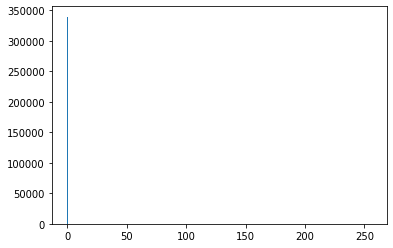

In [51]:
plt.hist(img4.ravel(),256,[0,256])
plt.show()

# **Equalização de Histograma**

Distribuir de forma mais uniforme as intensidades dos pixels sobre a imagem. Logo, é possível identificar a diferença uma vez que o acumulo de pixels próximo a alguns valores é suavizado.

In [48]:
img = cv.imread('/content/ponte.jpg') 
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY) 
h_eq = cv.equalizeHist(img)

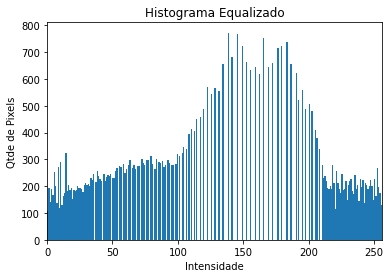

In [49]:
plt.figure() 
plt.title("Histograma Equalizado") 
plt.xlabel("Intensidade") 
plt.ylabel("Qtde de Pixels") 
plt.hist(h_eq.ravel(), 256, [0,256]) 
plt.xlim([0, 256]) 
plt.show() 

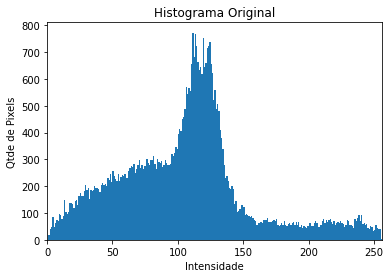

In [50]:
plt.figure() 
plt.title("Histograma Original") 
plt.xlabel("Intensidade") 
plt.ylabel("Qtde de Pixels") 
plt.hist(img.ravel(), 256, [0,256]) 
plt.xlim([0, 256]) 
plt.show() 